In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
from sklearn .datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import svm

In [ ]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

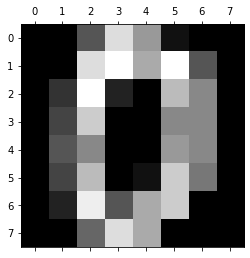

In [ ]:
pl.gray()
pl.matshow(digits.images[0])
pl.show()

In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

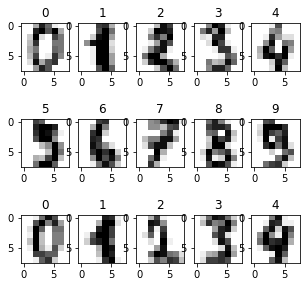

In [ ]:
images_and_labels = list(zip(digits.images,digits.target))
plt.figure(figsize=(5,5))
for index, (image,label) in enumerate(images_and_labels[:15]):
  plt.subplot(3,5,index+1)
  plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
  plt.title('%i'% label)

In [ ]:
n_samples = len(digits.images)
print(n_samples)

1797


In [ ]:
x=digits.images.reshape((n_samples,-1))
y=digits.target

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
print(x_train.shape)
print(x_test.shape)
input_shape = (28, 28, 1)

(1347, 64)
(450, 64)


In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [ ]:
batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('mnist.h5')
print("Saving the model as mnist.h5")

AttributeError: ignored

In [ ]:
model_linear = svm.SVC(kernel='linear',degree=3,gamma='scale')
model_linear.fit(x_train,y_train)
y_pred = model_linear.predict(x_test)

In [ ]:
model_linear.score(x_test,y_test)

0.9844444444444445

In [ ]:
model_rbf = svm.SVC(degree = 3, gamma='scale',kernel='rbf')
model_rbf.fit(x_train,y_train)
y_pred2 = model_rbf.predict(x_test)
model_rbf.score(x_test,y_test)

0.9911111111111112

In [ ]:
from sklearn.metrics import classification_report
predictions = model_linear.predict(x_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.95      0.98      0.96        41
           2       0.97      1.00      0.99        38
           3       1.00      1.00      1.00        43
           4       0.95      1.00      0.98        42
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        51
           7       0.98      0.96      0.97        49
           8       0.98      0.94      0.96        52
           9       1.00      0.97      0.99        38

    accuracy                           0.98       450
   macro avg       0.98      0.99      0.98       450
weighted avg       0.98      0.98      0.98       450

